In [2]:
#Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. 
#Plot the two-dimensional dataset.
#Then generalize to multiple linear regression and observe how the performance varies.

In [1]:
#Seleziona due attributi continui, definisci un problema di regressione e prova a risolverlo usando diverse tecniche che riportano varie misure di valutazione. 
#Traccia il set di dati bidimensionale. 
#Quindi generalizza a regressione lineare multipla e osserva come varia la prestazione.

In [31]:
# Python code to illustrate  
# regression using data set 
import matplotlib 

import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model 
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [32]:
df = pd.read_csv("dataset_All_normalized.csv")

In [33]:
df

,Temperature,Light,CO2,HumidityRatio,Day,Afternoon,Evening,Night,Weekday,Weekend,Occupancy
0,0.869029,0.603964,0.208231,0.549737,0,1,0,0,1,0,1
1,0.872357,0.596946,0.215163,0.551972,0,1,0,0,1,0,1
2,0.874576,0.591029,0.220898,0.549997,0,1,0,0,1,0,1
3,0.873190,0.509582,0.224045,0.544374,0,1,0,0,1,0,1
4,0.879014,0.504267,0.226675,0.550376,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20555,0.335593,0.443530,0.676157,0.404757,1,0,0,0,1,0,1
20556,0.344838,0.437080,0.681881,0.409306,1,0,0,0,1,0,1
20557,0.349461,0.437080,0.686214,0.411030,1,0,0,0,1,0,1
20558,0.349461,0.432177,0.754603,0.422253,1,0,0,0,1,0,1


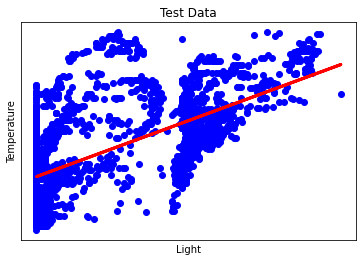

In [5]:
y = df['Temperature']
X = df['Light']
X=X.values.reshape(len(X),1) 
y=y.values.reshape(len(y),1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
# Plot outputs 
plt.scatter(X_test, y_test,  color='blue') 
plt.title('Test Data') 
plt.xlabel('Light') 
plt.ylabel('Temperature') 
plt.xticks(()) 
plt.yticks(()) 


# Create linear regression object 
regr = linear_model.LinearRegression() 
   
# Train the model using the training sets 
regr.fit(X_train, y_train) 

# Plot outputs 
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3) 

plt.show() 

In [ ]:
# Qui in questo grafico, tracciamo i dati del test. La linea rossa indica la linea più adatta per prevedere Y. 
# Per effettuare una previsione individuale utilizzando il modello di regressione lineare.
# La relazione lineare è positiva quindi quando la vairabile indipendente aumenta, aumenta anche la variabile dipendente


In [10]:
# Interpretazione della tabella:
# Per prima cosa abbiamo la Variabile dipendente, il modello utilizzato e il metodo
# - OSL - Ordinary Least Squares: minimizza la somma dei quadrati delle differenze tra la variabile dipendente osservata
#                                nel dataset dato e quelli previsti dalla funzione lineare
# - Least Squares: quindi stiamo cercando la lina di regressione che minimizzi il quadrato della distanza della linea
#                  di regressione
# - coef: indica che quando CO2 si incrementa di 1 la HumidityRatio si incrementa di 1.3340
# - R-squared: la percentuale di varianza spiegata dal nostro modello
# - standard error: è la deviazione standard della distribuzione campionaria di una statistica, più comunemente della media
# - i punteggi t e i valori p, per il test di ipotesi 

# REGRESSIONE LINEARE

In [6]:
from sklearn import linear_model
class_name = 'Occupancy'

## Linear Regression in 2 dimensions

In [16]:
y = df['Temperature']
X = df['Light']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
lm = linear_model.LinearRegression()

model = lm.fit(X_train.values.reshape(-1, 1),y_train)
print('Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
y_pred = lm.predict(X_test.values.reshape(-1,1))
print(y_pred[0:5])
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print("Score (Accuracy):", model.score(X_test.values.reshape(-1, 1), y_test))
res = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
res

Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): 
 [0.62546669]
Intercept: 
 0.2684988442678975
[0.26849884 0.56156595 0.26849884 0.26849884 0.55123759]
R2: 0.489
MSE: 0.019
MAE: 0.106
Score (Accuracy): 0.489215160776


,Actual,Predicted
0,0.203390,0.268499
1,0.462250,0.561566
2,0.257011,0.268499
3,0.277350,0.268499
4,0.684129,0.551238
...,...,...
6163,0.257011,0.268499
6164,0.369800,0.268499
6165,0.184900,0.292383
6166,0.092450,0.268499


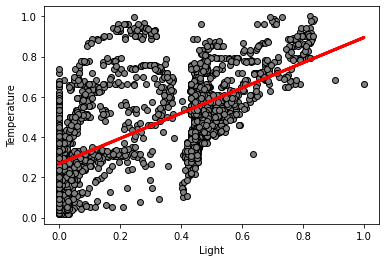

In [12]:
## PLOT DELLA LINEA DI REGRESSIONE
plt.scatter(X_test, y_test,  color='gray', edgecolors=(0, 0, 0))
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Light') 
plt.ylabel('Temperature') 
plt.show()

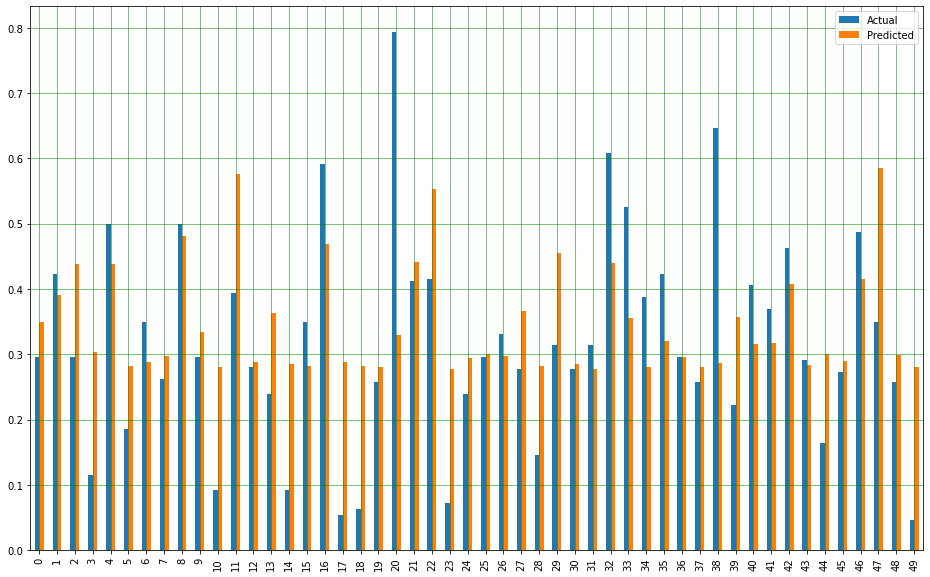

In [18]:
# BAR PLOT DEI RISULTATI
df1 = res[0:50]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [80]:
actual = res["Actual"]
prediction = res["Predicted"]
mean = abs(actual - prediction)

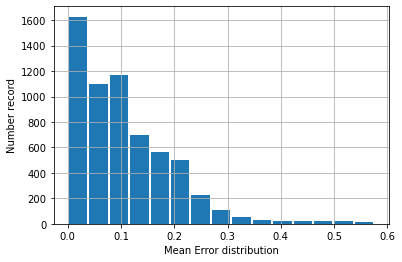

In [81]:
plt.hist(mean, bins=15, rwidth=0.9)
plt.xlabel("Mean Error distribution")
plt.ylabel("Number record")
plt.grid()
plt.show()

In [82]:
# VALUTAZIONE DEL MODELLO
from sklearn import metrics
""""Il passaggio finale consiste nel valutare le prestazioni dell'algoritmo. 
Questo passaggio è particolarmente importante per confrontare le prestazioni 
di algoritmi diversi su un determinato set di dati. Per gli algoritmi di regressione, 
vengono comunemente utilizzate tre metriche di valutazione:"""
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10610317380832024
Mean Squared Error: 0.01935733553070522
Root Mean Squared Error: 0.139130641954622


# BAYESINARIDGE

In [17]:
from sklearn.linear_model import Ridge, Lasso
#y = df['Temperature']
#X = df['Light']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
lm = linear_model.BayesianRidge()
model = lm.fit(X_train.values.reshape(-1, 1),y_train)
print('Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
y_pred = lm.predict(X_test.values.reshape(-1,1))
print(y_pred[0:5])
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print("Score (Accuracy):", model.score(X_test.values.reshape(-1, 1), y_test))
res = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
res

Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): 
 [0.62541825]
Intercept: 
 0.268505314036397
[0.26850531 0.56154973 0.26850531 0.26850531 0.55122217]
R2: 0.489
MSE: 0.019
MAE: 0.106
Score (Accuracy): 0.48921548366526013


,Actual,Predicted
0,0.203390,0.268505
1,0.462250,0.561550
2,0.257011,0.268505
3,0.277350,0.268505
4,0.684129,0.551222
...,...,...
6163,0.257011,0.268505
6164,0.369800,0.268505
6165,0.184900,0.292388
6166,0.092450,0.268505


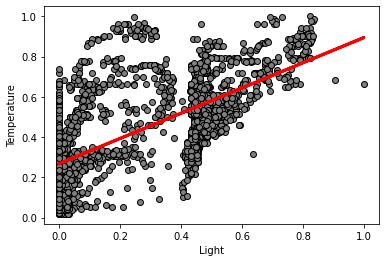

In [14]:
## PLOT DELLA LINEA DI REGRESSIONE
plt.scatter(X_test, y_test,  color='gray', edgecolors=(0, 0, 0))
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Light') 
plt.ylabel('Temperature') 
plt.show()

# LASSO

In [18]:
from sklearn.linear_model import Ridge, Lasso
y = df['Temperature']
X = df['Light']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
lm = Lasso()

model = lm.fit(X_train.values.reshape(-1, 1),y_train)
print('Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
y_pred = lm.predict(X_test.values.reshape(-1,1))
print(y_pred[0:5])
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print("Score (Accuracy):", model.score(X_test.values.reshape(-1, 1), y_test))
res = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
res

Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): 
 [0.]
Intercept: 
 0.35204688504277215
[0.35204689 0.35204689 0.35204689 0.35204689 0.35204689]
R2: -0.000
MSE: 0.038
MAE: 0.153
Score (Accuracy): -4.963926422973941e-05


,Actual,Predicted
0,0.203390,0.352047
1,0.462250,0.352047
2,0.257011,0.352047
3,0.277350,0.352047
4,0.684129,0.352047
...,...,...
6163,0.257011,0.352047
6164,0.369800,0.352047
6165,0.184900,0.352047
6166,0.092450,0.352047


# Ridge

In [19]:
y = df['Temperature']
X = df['Light']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
lm = Ridge()

model = lm.fit(X_train.values.reshape(-1, 1),y_train)
print('Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
y_pred = lm.predict(X_test.values.reshape(-1,1))
print(y_pred[0:5])
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print("Score (Accuracy):", model.score(X_test.values.reshape(-1, 1), y_test))
res = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
res

Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): 
 [0.62452576]
Intercept: 
 0.2686245315973116
[0.26862453 0.56125076 0.26862453 0.26862453 0.55093794]
R2: 0.489
MSE: 0.019
MAE: 0.106
Score (Accuracy): 0.4892203741944495


,Actual,Predicted
0,0.203390,0.268625
1,0.462250,0.561251
2,0.257011,0.268625
3,0.277350,0.268625
4,0.684129,0.550938
...,...,...
6163,0.257011,0.268625
6164,0.369800,0.268625
6165,0.184900,0.292473
6166,0.092450,0.268625


# ALTRA VERSIONE DELLA RIDGE 

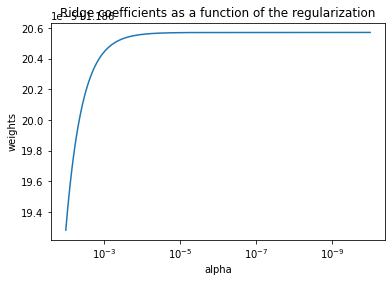

In [20]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train.values.reshape(-1,1), y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# RIDGECV

In [21]:

y = df['Temperature']
X = df['Light']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
lm = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

model = lm.fit(X_train.values.reshape(-1, 1),y_train)
print('Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
y_pred = lm.predict(X_test.values.reshape(-1,1))
print(y_pred[0:5])
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print("Score (Accuracy):", model.score(X_test.values.reshape(-1, 1), y_test))
res = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
res

Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): 
 [0.62545727]
Intercept: 
 0.26850010291990684
[0.2685001  0.56156279 0.2685001  0.2685001  0.55123459]
R2: 0.489
MSE: 0.019
MAE: 0.106
Score (Accuracy): 0.4892152240557261


,Actual,Predicted
0,0.203390,0.268500
1,0.462250,0.561563
2,0.257011,0.268500
3,0.277350,0.268500
4,0.684129,0.551235
...,...,...
6163,0.257011,0.268500
6164,0.369800,0.268500
6165,0.184900,0.292384
6166,0.092450,0.268500


Coefficients: 
 [0.62546669]
Variance score: 0.489215160776


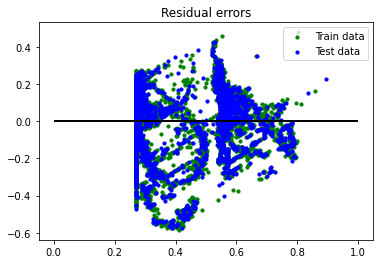

In [22]:
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train.values.reshape(-1, 1), y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test.values.reshape(-1, 1), y_test))) 
  
# plot for residual error 
  
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train.values.reshape(-1, 1)), reg.predict(X_train.values.reshape(-1, 1)) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test.values.reshape(-1, 1)), reg.predict(X_test.values.reshape(-1, 1)) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 1, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

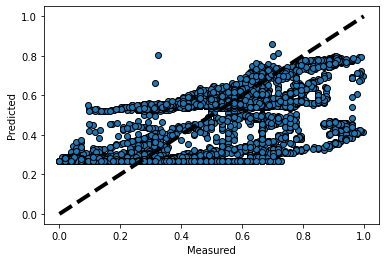

In [23]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_train.values.reshape(-1,1), y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# MULTIPLE LINEAR REGRESSION

In [103]:
y = df['Temperature']
X = df.drop(columns = ["Temperature",  "Weekend", "Afternoon",
                    "Night", "Occupancy"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
lm = linear_model.LinearRegression()

model = lm.fit(X_train,y_train)
print('Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
y_pred = lm.predict(X_test)
print(y_pred[0:5])
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print("Score (Accuracy):", model.score(X_test, y_test))
res = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
res

Coefficients - Per ogni cambiamento di una unità di X, y cambia del (%): 
 [ 0.59274003  0.07879734  0.01689294 -0.07721677  0.02362829  0.09105552]
Intercept: 
 0.19911385038985202
[0.32784893 0.52909239 0.31773987 0.29195177 0.59128054]
R2: 0.580
MSE: 0.016
MAE: 0.092
Score (Accuracy): 0.5795143433858297


,Actual,Predicted
0,0.203390,0.327849
1,0.462250,0.529092
2,0.257011,0.317740
3,0.277350,0.291952
4,0.684129,0.591281
...,...,...
6163,0.257011,0.291787
6164,0.369800,0.327151
6165,0.184900,0.160763
6166,0.092450,0.206862


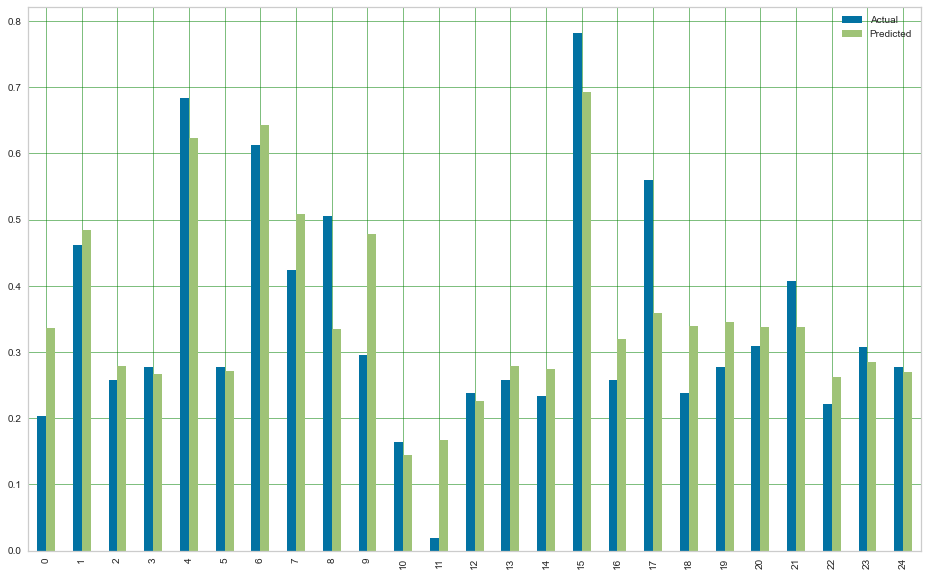

In [79]:
# BAR PLOT DEI RISULTATI
df1 = res[0:25]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [80]:
actual = res["Actual"]
prediction = res["Predicted"]
mean = abs(actual - prediction)

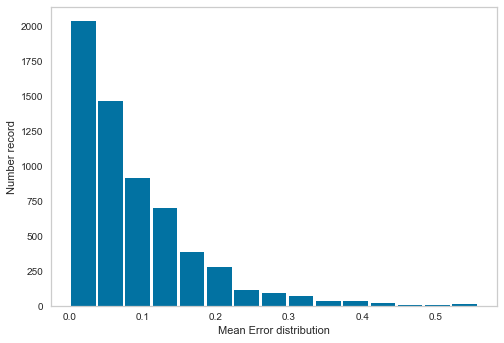

In [81]:
plt.hist(mean, bins=15, rwidth=0.9)
plt.xlabel("Mean Error distribution")
plt.ylabel("Number record")
plt.grid()
plt.show()

In [82]:
# VALUTAZIONE DEL MODELLO
from sklearn import metrics
""""Il passaggio finale consiste nel valutare le prestazioni dell'algoritmo. 
Questo passaggio è particolarmente importante per confrontare le prestazioni 
di algoritmi diversi su un determinato set di dati. Per gli algoritmi di regressione, 
vengono comunemente utilizzate tre metriche di valutazione:"""
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08713077048667174
Mean Squared Error: 0.014248345999166844
Root Mean Squared Error: 0.1193664358149595


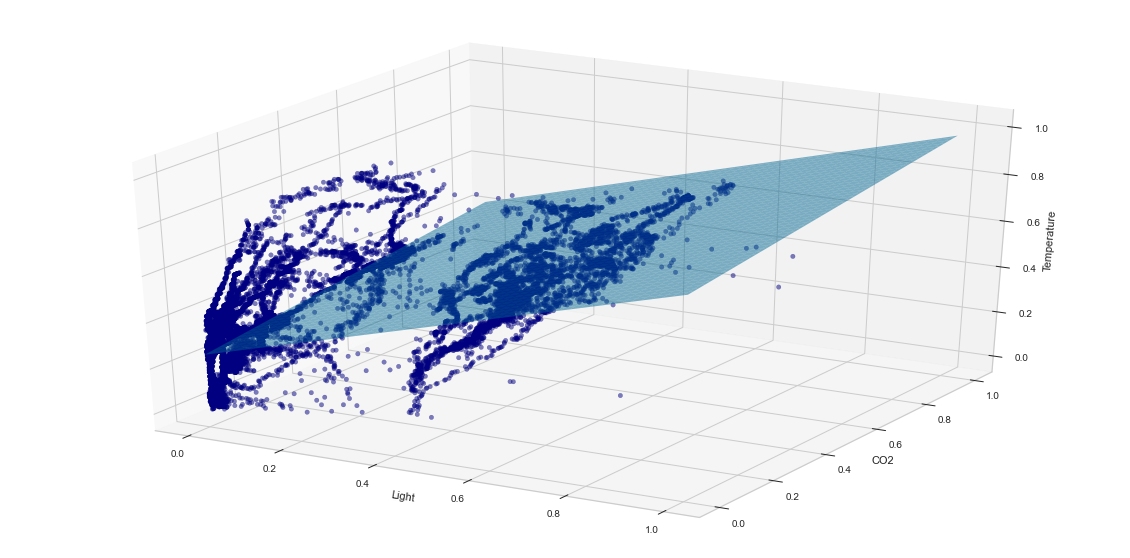

In [73]:
## Apply multiple Linear Regression
df2 = df.drop(columns = ["HumidityRatio", "Day", "Afternoon", "Evening", "Night", "Weekday", "Weekend", "Occupancy"])
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='Temperature ~ Light + CO2', data=df2)
results_formula = model.fit()
results_formula.params



## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(df2.Light.min(), df2.Light.max(), 100),np.linspace(df2.CO2.min(), df2.CO2.max(), 100))
onlyX = pd.DataFrame({'Light': x_surf.ravel(), 'CO2': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)



## convert the predicted result in an array
fittedY=np.array(fittedY)




# Visualize the Data for Multiple Linear Regression

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Light'],df2['CO2'],df2['Temperature'],c='navy', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.5)
ax.set_xlabel('Light')
ax.set_ylabel('CO2')
ax.set_zlabel('Temperature')
plt.show()
